# Activation Functions

### A simple visual showcase of what each activation function does.

## Tanh (Hyperbolic Tangent)

In [1]:
from dl_lib.activations import (
    tanh, tanh_prime, relu, relu_prime,
    leaky_relu, leaky_relu_prime
)
import numpy as np
from math import atan, sin, pi, sqrt
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")

In [2]:
def plot_activation_function(func, func_prime, plot_scale, tangent_points=[]):
    """
    Plots a function in two subplots, one with and one without tangent lines.
    
    Parameters
    ----------
    func : callable
        The function being plotted.
    func_prime : callable
        Function that returns the derivative of a given point for this function.
    plot_scale : float or int
        How large to make the plot/how far to extend away from 0 on the x axis.
    tangent_points : iterable, optional
        The x coordinantes at which to draw each tangent line.
    """
    
    # Plotting our activation function
    X = np.linspace(-1 * plot_scale, plot_scale)
    y = func(X)
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(5 * plot_scale, 10))
    # TODO(Alec): Fix ylim setting bug.
    plt.ylim(-1, 1)
    axes[0].plot(X, y, color="red")
    plt.ylim(-1, 1)
    axes[1].plot(X, y, color="red")

    # Plotting our tangent lines
    for x in tangent_points:
        # Each tangent point is the x coord of a tangent line
        x = np.asarray(x)
        y = func(x)
        m = func_prime(x)
        plot_tangent_lines(axes[1], x, y, m)

In [3]:
def plot_tangent_lines(ax, x, y, m, line_scale=.5):
    """
    Plot a tangent line given an (x, y) point and a slope.
    """
    
    # Radians of all three corners
    print(x, m)
    angle_c = pi / 2
    angle_a = atan(m)
    angle_b = angle_c - angle_a

    # Lengths of all three sides
    c = line_scale
    a = c * sin(angle_a)
    b = sqrt(c**2 - a**2)

    # Coordinates of points on each line
    tangent_x = [x - b, x + b]
    tangent_y = [y - a, y + a]
    ax.plot(tangent_x, tangent_y, color="blue");

-1.5 0.18070663892364858
0 1.0
1.5 0.18070663892364858


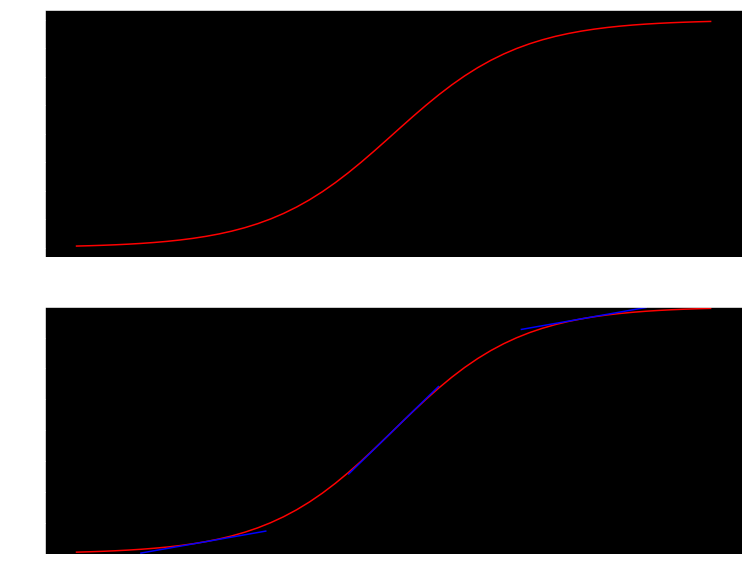

In [4]:
plot_activation_function(tanh, tanh_prime, 
                         plot_scale=2.5, 
                         tangent_points=[-1.5, 0, 1.5])

-1.5 0.0
0 0.0
1.5 1.0


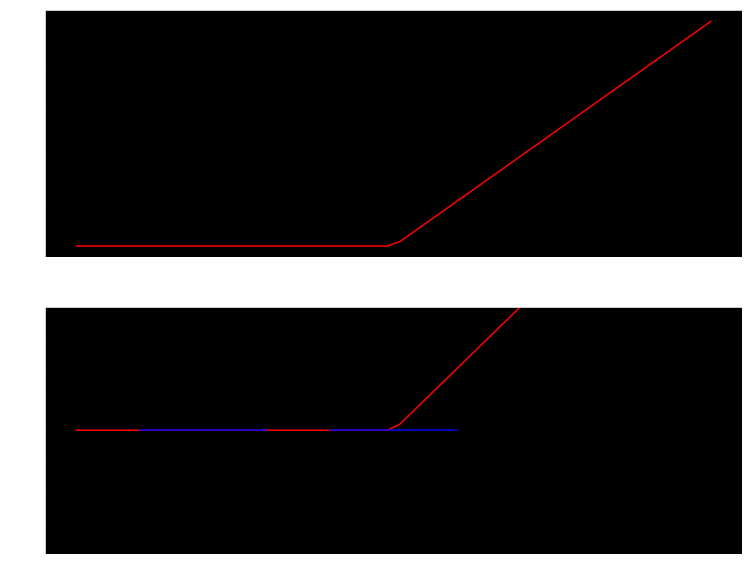

In [5]:
plot_activation_function(relu, relu_prime, 
                         plot_scale=2.5, 
                         tangent_points=[-1.5, 0, 1.5])

-1.5 0.1
0 0.0
1.5 1.0


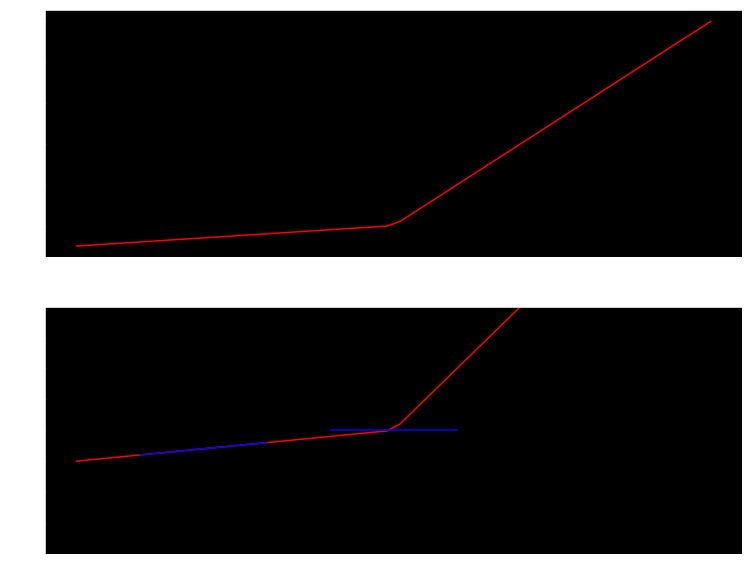

In [6]:
plot_activation_function(leaky_relu, leaky_relu_prime, 
                         plot_scale=2.5, 
                         tangent_points=[-1.5, 0, 1.5])